# Intro to ML Project
## Task 4
### Jan Bauer, Alaisha Sharma

In [20]:
import numpy as np
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils, to_categorical

from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
# same seed for consistency
seed = 1
np.random.seed(seed)

In [4]:
train_data_labeled = pd.read_hdf("data/train_labeled.h5", "train")
train_data_labeled.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139
0,5,0.791590,0.753101,0.577893,0.726169,0.395992,0.542416,0.482571,0.409337,0.365332,...,0.662795,0.569457,0.328729,0.356595,0.642982,0.545763,0.673734,0.487183,0.504894,0.670266
1,8,0.798071,0.757271,0.575022,0.729636,0.400243,0.536507,0.483917,0.415249,0.374363,...,0.660528,0.573125,0.334675,0.360123,0.641473,0.552560,0.672730,0.486268,0.509508,0.670837
2,7,0.794205,0.752145,0.570502,0.728514,0.407141,0.545053,0.482661,0.414902,0.370317,...,0.667669,0.576651,0.325308,0.365656,0.640514,0.568385,0.672446,0.485341,0.500234,0.678961
3,2,0.793530,0.752631,0.575777,0.723480,0.395984,0.548614,0.488048,0.412096,0.373032,...,0.663633,0.574640,0.332292,0.361036,0.642928,0.545435,0.671515,0.481010,0.509037,0.673317
4,1,0.794775,0.745556,0.570395,0.724464,0.399826,0.546392,0.490428,0.412121,0.365301,...,0.666438,0.578923,0.327307,0.370091,0.648864,0.557257,0.673051,0.481574,0.503186,0.674417


In [5]:
X_train_labeled = train_data_labeled.iloc[:,1:]
X_train_labeled.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139
0,0.791590,0.753101,0.577893,0.726169,0.395992,0.542416,0.482571,0.409337,0.365332,0.163388,...,0.662795,0.569457,0.328729,0.356595,0.642982,0.545763,0.673734,0.487183,0.504894,0.670266
1,0.798071,0.757271,0.575022,0.729636,0.400243,0.536507,0.483917,0.415249,0.374363,0.159272,...,0.660528,0.573125,0.334675,0.360123,0.641473,0.552560,0.672730,0.486268,0.509508,0.670837
2,0.794205,0.752145,0.570502,0.728514,0.407141,0.545053,0.482661,0.414902,0.370317,0.164221,...,0.667669,0.576651,0.325308,0.365656,0.640514,0.568385,0.672446,0.485341,0.500234,0.678961
3,0.793530,0.752631,0.575777,0.723480,0.395984,0.548614,0.488048,0.412096,0.373032,0.160413,...,0.663633,0.574640,0.332292,0.361036,0.642928,0.545435,0.671515,0.481010,0.509037,0.673317
4,0.794775,0.745556,0.570395,0.724464,0.399826,0.546392,0.490428,0.412121,0.365301,0.161424,...,0.666438,0.578923,0.327307,0.370091,0.648864,0.557257,0.673051,0.481574,0.503186,0.674417


In [12]:
y_train = train_data_labeled.iloc[:,0:1]
y_train.head()

,y
0,5
1,8
2,7
3,2
4,1


In [7]:
train_data_unlabeled = pd.read_hdf("data/train_unlabeled.h5", "train")
train_data_unlabeled.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139
9000,0.802073,0.751775,0.572571,0.729820,0.401511,0.546931,0.483566,0.409619,0.369915,0.162539,...,0.663145,0.578450,0.325368,0.363988,0.640859,0.563103,0.673581,0.480801,0.506701,0.670141
9001,0.796261,0.747018,0.576803,0.720181,0.397541,0.543298,0.490455,0.410719,0.365985,0.159075,...,0.667465,0.574655,0.331916,0.366610,0.644864,0.544353,0.670754,0.485595,0.507704,0.670917
9002,0.794176,0.751640,0.570850,0.722511,0.401524,0.538023,0.481063,0.413562,0.371465,0.158596,...,0.659293,0.568071,0.327978,0.357855,0.643347,0.558021,0.674759,0.486917,0.507812,0.681148
9003,0.795145,0.753813,0.577260,0.727300,0.399132,0.540990,0.483486,0.410847,0.367753,0.163416,...,0.663264,0.573702,0.326960,0.356632,0.648938,0.553826,0.674693,0.494589,0.503478,0.675546
9004,0.795453,0.749442,0.574719,0.717568,0.395512,0.548442,0.489007,0.413862,0.365941,0.161363,...,0.660846,0.577899,0.333309,0.363624,0.647993,0.541827,0.675881,0.486793,0.508442,0.664697


In [29]:
X_train_unlabeled = train_data_unlabeled.iloc[:,:]
X_train_unlabeled.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139
9000,0.802073,0.751775,0.572571,0.729820,0.401511,0.546931,0.483566,0.409619,0.369915,0.162539,...,0.663145,0.578450,0.325368,0.363988,0.640859,0.563103,0.673581,0.480801,0.506701,0.670141
9001,0.796261,0.747018,0.576803,0.720181,0.397541,0.543298,0.490455,0.410719,0.365985,0.159075,...,0.667465,0.574655,0.331916,0.366610,0.644864,0.544353,0.670754,0.485595,0.507704,0.670917
9002,0.794176,0.751640,0.570850,0.722511,0.401524,0.538023,0.481063,0.413562,0.371465,0.158596,...,0.659293,0.568071,0.327978,0.357855,0.643347,0.558021,0.674759,0.486917,0.507812,0.681148
9003,0.795145,0.753813,0.577260,0.727300,0.399132,0.540990,0.483486,0.410847,0.367753,0.163416,...,0.663264,0.573702,0.326960,0.356632,0.648938,0.553826,0.674693,0.494589,0.503478,0.675546
9004,0.795453,0.749442,0.574719,0.717568,0.395512,0.548442,0.489007,0.413862,0.365941,0.161363,...,0.660846,0.577899,0.333309,0.363624,0.647993,0.541827,0.675881,0.486793,0.508442,0.664697


In [9]:
X_test = pd.read_hdf("data/test.h5", "test")
X_test.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139
30000,0.795621,0.753163,0.572225,0.727620,0.400279,0.541950,0.478941,0.414370,0.371107,0.164238,...,0.664335,0.571888,0.325982,0.359063,0.639611,0.553841,0.674134,0.484140,0.510139,0.668640
30001,0.793922,0.745725,0.571753,0.721803,0.399201,0.548342,0.483106,0.410964,0.369730,0.160543,...,0.668972,0.579854,0.336250,0.369700,0.647012,0.552805,0.673593,0.483753,0.509276,0.675991
30002,0.791894,0.757128,0.573741,0.724121,0.401164,0.547744,0.481351,0.415416,0.368478,0.161942,...,0.663038,0.568997,0.328963,0.355481,0.641702,0.551018,0.675904,0.488888,0.506695,0.675925
30003,0.794773,0.747188,0.571375,0.719419,0.398849,0.541140,0.486918,0.422196,0.371877,0.160025,...,0.665051,0.578397,0.332610,0.370070,0.643746,0.550737,0.674714,0.487900,0.509579,0.672635
30004,0.796351,0.751545,0.569544,0.718811,0.401796,0.543482,0.484521,0.420023,0.369082,0.158959,...,0.663495,0.577053,0.332620,0.366809,0.641575,0.545131,0.678834,0.488806,0.512001,0.672110


In [30]:
scaler = StandardScaler()  
scaler.fit(X_train_labeled)  
X_train_labeled = scaler.transform(X_train_labeled)  
X_train_unlabeled = scaler.transform(X_train_unlabeled)
X_test = scaler.transform(X_test)  

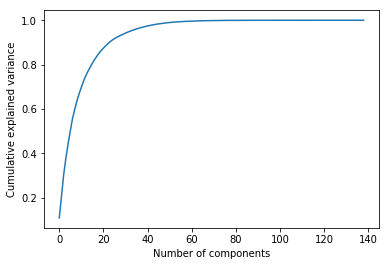

In [31]:
pca = PCA(n_components=139)
pca.fit(X_train_labeled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [34]:
k = 40
pca = PCA(n_components=k)
X_train_labeled_pca = pca.fit_transform(X_train_labeled)

X_train_unlabeled_pca = pca.transform(X_train_unlabeled)
X_test_pca = pca.transform(X_test)
pca_std = np.std(X_train_labeled_pca)

array([[-0.07324126,  0.69622899, -0.78104536, ..., -0.15588816,
         1.00031779, -1.15915928],
       [-0.73751054, -1.89980251, -0.91036259, ..., -0.2728759 ,
         0.76683616,  0.78237649],
       [-1.53001137,  2.08040879, -0.36501964, ...,  1.27764129,
         0.06909848,  0.76479385],
       ...,
       [ 0.17201557, -0.32908476, -2.41818607, ..., -1.32229216,
        -0.86539205,  1.88498268],
       [ 0.3435113 , -1.18117579, -1.39517547, ...,  0.01855413,
        -1.24839926,  0.9765096 ],
       [ 1.55952108,  0.64434123,  1.89377247, ..., -0.63889337,
         0.06771264, -2.22619093]])

In [13]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y = encoder.transform(y_train)
onehot_y = np_utils.to_categorical(encoded_y)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
classifier = Sequential()
in_dim = X_train_labeled.shape[1]
out_dim = onehot_y.shape[1]

# first hidden Layer
classifier.add(Dense(40, activation='relu', kernel_initializer='random_normal', input_dim=in_dim))
# second hidden Layer
classifier.add(Dense(30, activation='relu', kernel_initializer='random_normal'))
# third hidden Layer
classifier.add(Dense(20, activation='relu', kernel_initializer='random_normal'))
# fourth hidden Layer
classifier.add(Dense(15, activation='relu', kernel_initializer='random_normal'))
# output layer
classifier.add(Dense(out_dim, activation='softmax', kernel_initializer='random_normal'))

classifier.compile(optimizer ='adam',loss='categorical_crossentropy', metrics =['accuracy'])
classifier.fit(X_train_labeled, onehot_y, batch_size=100, epochs=100)

Epoch 1/100
9000/9000 [==============================] - 1s 77us/step - loss: 2.1025 - acc: 0.1964
Epoch 2/100
9000/9000 [==============================] - 0s 31us/step - loss: 1.4556 - acc: 0.3993
Epoch 3/100
9000/9000 [==============================] - 0s 34us/step - loss: 1.0221 - acc: 0.6620
Epoch 4/100
9000/9000 [==============================] - 0s 45us/step - loss: 0.7260 - acc: 0.7738
Epoch 5/100
9000/9000 [==============================] - 0s 45us/step - loss: 0.6091 - acc: 0.8113
Epoch 6/100
9000/9000 [==============================] - 0s 34us/step - loss: 0.5522 - acc: 0.8321
Epoch 7/100
9000/9000 [==============================] - 0s 35us/step - loss: 0.5058 - acc: 0.8481
Epoch 8/100
9000/9000 [==============================] - 0s 37us/step - loss: 0.4717 - acc: 0.8600
Epoch 9/100
9000/9000 [==============================] - 0s 37us/step - loss: 0.4470 - acc: 0.8644
Epoch 10/100
9000/9000 [==============================] - 0s 35us/step - loss: 0.4203 - acc: 0.8742
Epoch 11/

9000/9000 [==============================] - 0s 34us/step - loss: 0.0853 - acc: 0.9727
Epoch 83/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.0882 - acc: 0.9714
Epoch 84/100
9000/9000 [==============================] - 0s 35us/step - loss: 0.0786 - acc: 0.9751
Epoch 85/100
9000/9000 [==============================] - 0s 36us/step - loss: 0.0808 - acc: 0.9747
Epoch 86/100
9000/9000 [==============================] - 0s 34us/step - loss: 0.0828 - acc: 0.9721
Epoch 87/100
9000/9000 [==============================] - 0s 35us/step - loss: 0.0821 - acc: 0.9737
Epoch 88/100
9000/9000 [==============================] - 0s 36us/step - loss: 0.0792 - acc: 0.9766
Epoch 89/100
9000/9000 [==============================] - 0s 33us/step - loss: 0.0716 - acc: 0.9789
Epoch 90/100
9000/9000 [==============================] - 0s 38us/step - loss: 0.0690 - acc: 0.9792
Epoch 91/100
9000/9000 [==============================] - 0s 34us/step - loss: 0.0744 - acc: 0.9768
Epoch 92/100


In [17]:
pred_ker = classifier.predict(X_test)
# find most likely category from soft max
pred_ker = np.argmax(pred_ker, axis=-1)

In [18]:
# convert back to pandas dataframe
X_test = pd.DataFrame(X_test)
pred_submit = pd.DataFrame(list(zip(X_test.index.values + 30000, pred_ker)), columns=['Id', 'y'])
final_submit = pred_submit.to_csv("submit.csv", index=False)